# Weather Trends

## Join Database tables

- `city_data`
- `global_data`

### <h3 align="center" id="heading">Data Model</h3>
| year | country | city | avg_temp_city | avg_temp_global |
|------|---------|------|---------------|-----------------|
| INT  | CHAR    | CHAR | ENUM          | ENUM            |

```sql
-- RENAME column name from global_data, city_data
ALTER TABLE city_data
RENAME COLUMN avg_temp TO avg_temp_city;
ALTER TABLE global_data
RENAME COLUMN avg_temp TO avg_temp_global;

-- INNER JOIN global_data and city_data tables
SELECT city_data.year, city_data.country, city_data.city, city_data.avg_temp_city, global_data.avg_temp_global
FROM city_data
INNER JOIN global_data ON city_data.year=global_data.year ORDER BY city_data.year, city_data.country, city_data.city;
```


## 1. Import Libraries
To load new `pip` package from https://pypi.org, run the following line. `!pip install <package_name>`. You need to validate packages. Otherwise your environment may be infected with a virus. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

## 2. Extract
I used pandas with `read_csv` function to extract csv to dataframe. Prefered to plot with `matplotlib`
* **cum_sum**: Cumulative summary of global temperature
* **count**: Indicates to nr. of years
* **mov_avg**: Moving average or rolling mean 

In [3]:
df = pd.read_csv("data/dataset.csv")
df

,year,country,city,avg_temp_city,avg_temp_global
0,1750,Albania,Tirana,15.91,8.72
1,1750,Austria,Vienna,8.86,8.72
2,1750,Belarus,Minsk,6.28,8.72
3,1750,Belgium,Brussels,10.73,8.72
4,1750,Bosnia And Herzegovina,Sarajevo,9.70,8.72
...,...,...,...,...,...
70234,2013,Venezuela,Valencia,26.60,9.61
70235,2013,Vietnam,Hanoi,23.10,9.61
70236,2013,Vietnam,Ho Chi Minh City,28.46,9.61
70237,2013,Zambia,Lusaka,20.14,9.61


## 3. Exploration

In [4]:
df

,year,country,city,avg_temp_city,avg_temp_global
0,1750,Albania,Tirana,15.91,8.72
1,1750,Austria,Vienna,8.86,8.72
2,1750,Belarus,Minsk,6.28,8.72
3,1750,Belgium,Brussels,10.73,8.72
4,1750,Bosnia And Herzegovina,Sarajevo,9.70,8.72
...,...,...,...,...,...
70234,2013,Venezuela,Valencia,26.60,9.61
70235,2013,Vietnam,Hanoi,23.10,9.61
70236,2013,Vietnam,Ho Chi Minh City,28.46,9.61
70237,2013,Zambia,Lusaka,20.14,9.61


### City filtered by Amsterdam 

In [5]:
city_name = "Amsterdam"
df = df.loc[df['city'] == city_name]

In [6]:
df

,year,country,city,avg_temp_city,avg_temp_global
29,1750,Netherlands,Amsterdam,10.04,8.72
108,1751,Netherlands,Amsterdam,9.63,7.98
187,1752,Netherlands,Amsterdam,5.97,5.78
271,1753,Netherlands,Amsterdam,9.08,8.39
357,1754,Netherlands,Amsterdam,8.72,8.47
...,...,...,...,...,...
68726,2009,Netherlands,Amsterdam,10.33,9.51
69068,2010,Netherlands,Amsterdam,8.84,9.70
69410,2011,Netherlands,Amsterdam,10.73,9.52
69752,2012,Netherlands,Amsterdam,10.08,9.51


In [7]:
df.reset_index()

,index,year,country,city,avg_temp_city,avg_temp_global
0,29,1750,Netherlands,Amsterdam,10.04,8.72
1,108,1751,Netherlands,Amsterdam,9.63,7.98
2,187,1752,Netherlands,Amsterdam,5.97,5.78
3,271,1753,Netherlands,Amsterdam,9.08,8.39
4,357,1754,Netherlands,Amsterdam,8.72,8.47
...,...,...,...,...,...,...
259,68726,2009,Netherlands,Amsterdam,10.33,9.51
260,69068,2010,Netherlands,Amsterdam,8.84,9.70
261,69410,2011,Netherlands,Amsterdam,10.73,9.52
262,69752,2012,Netherlands,Amsterdam,10.08,9.51


### Moving Average

In [8]:
year = df['year']
global_temp_ma =  df['avg_temp_global'].rolling(7).mean()
city_temp_ma =  df['avg_temp_city'].rolling(7).mean()

df = df.assign(ma_global = global_temp_ma.values, ma_city = city_temp_ma.values)

In [9]:
df

,year,country,city,avg_temp_city,avg_temp_global,ma_global,ma_city
29,1750,Netherlands,Amsterdam,10.04,8.72,NaN,NaN
108,1751,Netherlands,Amsterdam,9.63,7.98,NaN,NaN
187,1752,Netherlands,Amsterdam,5.97,5.78,NaN,NaN
271,1753,Netherlands,Amsterdam,9.08,8.39,NaN,NaN
357,1754,Netherlands,Amsterdam,8.72,8.47,NaN,NaN
...,...,...,...,...,...,...,...
68726,2009,Netherlands,Amsterdam,10.33,9.51,9.535714,10.541429
69068,2010,Netherlands,Amsterdam,8.84,9.70,9.560000,10.335714
69410,2011,Netherlands,Amsterdam,10.73,9.52,9.588571,10.401429
69752,2012,Netherlands,Amsterdam,10.08,9.51,9.561429,10.344286


## 4. Visualisation

Definition of done...

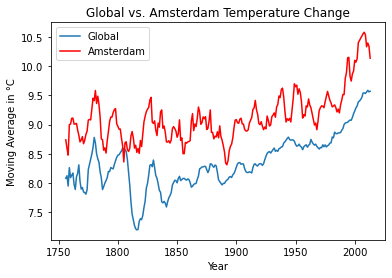

In [10]:


plt.plot(year, global_temp_ma, label="Global")
plt.plot(year, city_temp_ma, label="Amsterdam", color="red")
plt.legend()
plt.title( 'Global vs. Amsterdam Temperature Change')
plt.xlabel ('Year')
plt.ylabel('Moving Average in °C')
plt.show()